In [136]:
%matplotlib inline 


import numpy as np #To use functions or constants that are in the NumPy module, type np.function_name. EG: np.pi is pi
import numpy.random as nprd #This imports random number generation functions
import scipy as sp #SciPy has lots of useful numerical methods, so we don't have to write them
import scipy.linalg as spla #This imports the sub-module containing linear algebra methods
import matplotlib.pyplot as plt #This will let us display images nicely
import cv2
import random

In [150]:
# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity 
rhoxc=3000000
gamma=2000
k=1/2
Q_low,Q_high=4,10
D=k/rhoxc

Tcool = 37

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = (dx2/4)*(1/D)

u0 = Tcool * np.ones((nx, ny))
u = np.empty((nx, ny))

r, cx, cy = 1, 5, 5


In [151]:
dt*D

0.002500000000000001

In [152]:
#Heating at each time step 
def random_heat_source(nx,ny, r, cx, cy, Q_high, Q_low):
    Q = np.zeros((nx, ny))
    r2 = r**2
    for i in range(nx):
        for j in range(ny):
            p2 = (i*dx-cx)**2 + (j*dy-cy)**2
            if p2 < r2:
                Q[i,j] = random.uniform(Q_low,Q_high)
    return(Q[1:-1, 1:-1])

In [153]:
def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D*dt*(
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )+dt*random_heat_source(nx,ny, r, cx, cy, Q_high, Q_low) #-(dt*gamma/rhoxc)*(u0[1:-1, 1:-1]-37)

    u0 = u.copy()
    return u0, u

0 1
5 2
10 3
20 4


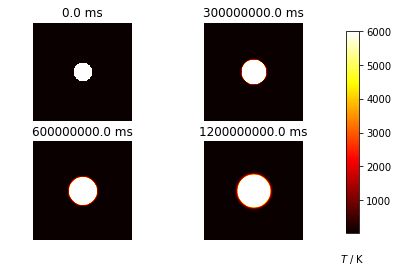

In [154]:
# Number of timesteps
nsteps = 501
# Output 4 figures at these timesteps
mfig = [0, 5,10, 20]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=6000)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*4000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

In [156]:
Q

NameError: name 'Q' is not defined

In [157]:
random_heat_source(nx,ny, r, cx, cy, Q_high, Q_low) 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
dt

12000.000000000004